# Проект урока 6. Решение продуктовых задач
#  «Анализ данных о транзакциях»

Представьте, что вы — аналитик данных в ритейле. Маркетинговый отдел попросил помочь решить несколько задач: нужно разобраться в поведении пользователей, проанализировать транзакции и выявить аномальный рост или проблемы, если они есть. Этот проект разделен на части, в каждой из них вы будете работать с разными наборами данных.

# Часть 1

## Шаг 1

В файле `6_data.zip` имеются следующие данные о транзакциях:

- InvoiceNo — номер заказа  
- StockCode — код товара  
- Description — описание товара  
- Quantity — количество единиц товара, добавленных в заказ  
- InvoiceDate — дата транзакции   
- UnitPrice — цена за единицу товара  
- CustomerID — id клиента  
- Country — страна, где проживает клиент

Каждая строка — это отдельная транзакция (т.е. добавление одного товара в корзину или его удаление, если это запись об отмененной транзакции). В данных нет кода для каждой транзакции, только для товара и для заказа. В одном заказе может быть несколько транзакций. Разные товары могут быть в разных заказах. Неотмененные транзакции считаются реализованными (т.е. эти товары были куплены).

Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную, чтобы в следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в Discord, ссылка на нужный тред есть на странице каждого шага в LMS.

## Шаг 2

Прочитайте данные с кодировкой `ISO-8859-1`, запишите полученный датафрейм в `retail`. **Проверьте, встречаются ли в данных повторяющиеся наблюдения, и в качестве ответа укажите их количество.** Если они есть, то удалите их из `retail` — дубликаты негативно влияют на точность анализа данных

Шаги выполнения:  
1. Импортируйте библиотеку pandas

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для импорта библиотеки напишите
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` — её общераспространённое сокращённое название.
</p>
</details>

In [1]:
import pandas as pd

2. Загрузите архив с csv файлом к уроку в свою папку в JupyterНub
3. Прочитайте этот датасет с кодировкой ISO-8859-1, результат сохранив в переменную `retail`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Данные находятся в csv файле в архиве формата ZIP. Для их загрузки воспользуемся функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу и задав параметры `encoding` и `compression`. Например,
```python
df = pd.read_csv('data.gzip', compression='gzip', encoding='utf-8')
```
считает файл csv в архиве `data.gzip`, хранящемся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете. Функция учтет, что файл в архиве с форматом `gzip` и имеет кодировку `utf-8`.
</p>
</details>

In [2]:
retail = pd.read_csv('../data/6_data.zip', encoding='windows-1251', compression='zip')

4. Посмотрите на содержимое датафрейма, проверьте его размер

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [6]:
retail.info()
retail.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


5. Отберите в датафрейме только повторяющиеся наблюдения (дубликаты)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи,** используйте аксессор `loc[]`, внутри которого примените к датафрейму метод `duplicated()`. Этот метод определяет, является ли строчка дубликатом другой строки или нет.

**Как применить метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
**Как использовать аксессор?** Например, код
```python
df.loc[df.some_method()]
```
вернет только те строки датафрейма `df`, где в результате применения метода `some_method()` будет `True`.
</p>
</details>

In [15]:
retail_duplicated = retail.loc[retail.duplicated()]
retail_duplicated

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


6. Определите количество записей в получившемся датафрейме с дубликатами

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Используйте атрибут `shape`, чтобы узнать количество строк. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
</p>
</details>

In [16]:
retail_duplicated.shape

(5268, 8)

7. Удалите повторяющиеся наблюдения из `retail`, результат сохранив в этот же датафрейм

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы удалить дубликаты,** используйте метод `drop_duplicates()`.

**Как применить метод?** Например, применим метод `some_method()` к датафрейму `df` и сохраним результат в тот же датафрейм:
```python
df = df.some_method()
```
     
</p>
</details>

In [17]:
retail = retail.drop_duplicates()


8. Проверьте размер получившегося датафрейма `retail` и убедитесь, что удаление дубликатов прошло корректно

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Используйте атрибут `shape`, чтобы узнать количество строк и столбцов.** Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
      
**Как понять, что удаление дубликатов прошло корректно?** У вас должно получиться количество строк, равное разнице между первоначальным числом строк этого датафрейма и количеством удаленных дубликатов. При этом количество столбцов должно остаться неизменным.
</p>
</details>

In [18]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


## Шаг 3

Продолжим предобработку данных перед их анализом. Данные содержат в себе записи как об успешных транзакциях, так и об отмененных. Если пользователь отменил транзакцию, в начале номера заказа (см.колонку `InvoiceNo`) ставится `C` (от `canceled`). **Сколько всего транзакций отменили пользователи?** Удалите эти записи из датафрейма `retail`, дальше они нам не понадобятся

Шаги выполнения:  
1. Определите для каждой строки в колонке `InvoiceNo`, начинается ли эта строка с английской буквы `C`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте аксессор `str` и метод `startswith()`. Этот метод определяет, начинается ли строка с той подстроки, что подана в метод.

**Как применить метод?** Например:
```python
df.col_str.str.startswith('abc')
```
используя аксессор `str`, применим строковый метод `some_method()` к колонке `col_str` со строковыми данными и подадим в метод подстроку 'abc'. Этот код вернёт колонку из логических значений:  
`True`, если значение в ячейке начинается со строки `abc`  
`False`, если значение начинается с чего-то другого.   
</p>
</details>

In [25]:
retail.InvoiceNo.str.startswith('C')



0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Name: InvoiceNo, Length: 536641, dtype: bool

2. Посчитайте количество строк в колонке `InvoiceNo`, начинающихся с английской буквы `C`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `sum()`, применив его к результату с первого шага выполнения, где для каждой ячейки указано `True` или `False`. Этот метод позволит вам посчитать, сколько ячеек начинается с английской буквы `C` (`True` считается как 1, `False` - как 0)

Как использовать метод? Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>


In [26]:
retail.InvoiceNo.str.startswith('C').value_counts()


InvoiceNo
False    527390
True       9251
Name: count, dtype: int64

3. Удалите записи об отмененных транзакциях из датафрейма `retail` - то есть ОСТАВЬТЕ в нем только те строки, которые в колонке `InvoiceNo` НЕ начинаются с английской буквы `C`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы оставить только нужные записи,** используйте аксессор `loc[]`, внутрь которого передайте условие, что значение в колонке `InvoiceNo` НЕ начинается с английской буквы `C`. Для этого внутри аксессора напишите код из первого шага выполнения и поставьте перед ним, но всё также внутри квадратных скобок знак `~`, который означает, что это условие не должно выполняться

**Как использовать аксессор?** Например, код
```python
df = df.loc[~df.some_method()]
```
оставит в датафрейме `df` только те строки, где в результате применения метода `some_method()` будет `False`
      
Не забудьте сохранить результат применения аксессора в тот же датафрейм `retail`
</p>
</details>

In [28]:
retail = retail.drop(retail[retail.InvoiceNo.str.startswith('C') == True].index)



## Шаг 4

Ваша задача — проанализировать покупки наиболее активных пользователей одной из стран. **Для этого сначала вам нужно найти пользователей из Германии, которые совершили значительное количество заказов, т.е. выше определенного порога N**. Ваши коллеги уже расчитали, что этот порог — 80-й процентиль. Иными словами, вам нужно посчитать число заказов (см.колонку `InvoiceNo`) для каждого пользователя (см. колонку `CustomerID`) из Германии (Germany) и оставить только тех, кто совершил более N заказов, где N – 80-й процентиль. Запишите полученные id пользователей в переменную `germany_top` (не весь датафрейм, только id).

**На LMS датафрейм сохранен в переменную `retail`. Загрузите в LMS Ваш код, в котором выполняете все эти шаги**

Шаги выполнения:  
1. Оставьте только записи о пользователях из Германии (см.колонку `Country`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи, используйте метод `query()`**, внутри которого напишите строку с условием: значение в колонке `Country` равно 'Germany'.

**Как использовать метод?** Давайте применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
           
Учтите, что условие нужно написать в единых кавычках, а название колонки — без кавычек. Целые числа и булевы значения (True, False) также пишутся без кавычек, а строки — в кавычках (двойных или одинарных — главное, не тех, в которые взяты оба условия).
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство.
      
</p>
</details>

In [29]:
retail.query('Country == "Germany"')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,12/9/2011 12:16,1.25,12713.0,Germany
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,12/9/2011 12:16,0.85,12713.0,Germany
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,12/9/2011 12:16,0.85,12713.0,Germany
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,12/9/2011 12:16,2.08,12713.0,Germany


2. Посчитайте количество заказов (не транзакций) для каждого пользователя и сохраните результат в новый датафрейм `invoice_dist`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные по столбцу `CustomerID`, используя метод `groupby()`**. Его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Чтобы колонка `CustomerID` не оказалась в индексе, используйте параметр `as_index=False`. Например,

```python
df.groupby('col_1', as_index=False)
```
сгруппирует данные датафрейма `df` по колонке `col_1`. При этом колонка `col_1` останется колонкой, а не индексом. Сама по себе группировка не вычисляет что-то по группам.
      
**После группировки используйте метод `agg()`**, в котором примените агрегирующую функцию `nunique` к колонке `InvoiceNo`. Функция посчитает число уникальных значений в колонке для каждого клиента

**Как использовать метод `agg()`?** Например, применим его к датафрейму `df` и посчитаем сумму по столбцу `column_name`:
```python
df.agg({'column_name':'sum'})
```

**Как использовать метод `agg()` после группировки?** Используйте цепочку методов, применив их друг за другом. Например:
```python
df.some_method_1().some_method_2()
```      
</p>
</details>

In [38]:
invoice_dist = retail.query('Country == "Germany"').groupby('CustomerID', as_index=False).agg({'InvoiceNo':'nunique'})


3. В получившемся датафрейме переименуйте колонку с числом заказов в `total_invoices`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Для переименования колонки передайте в метод `rename()` в параметр `columns` словарь, где ключами являются старые названия колонок, а значениями - новые названия. Например:

```python
df = df.rename(columns={'old_name':'new_name'})
```
</p>
</details>

In [40]:
invoice_dist = invoice_dist.rename(columns={'InvoiceNo':'total_invoices'})



4. Определите значение порога N – 80го процентиля для числа заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `quantile()` с параметром `q` равным 0.8**. Примените метод к колонке `total_invoices` в новом датафрейме `invoice_dist`

**Как использовать метод?** Например применим метод `some_method()` с параметром p равным 5 к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method(p=5)    
```

**Результат сохраните в переменную N**
</p>
</details>

In [77]:
N = invoice_dist.total_invoices.quantile(q=0.8)
N

np.float64(7.0)

5. Оставьте только записи о тех клиентах, кто совершил заказов больше, чем порог N

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи,** используйте аксессор `loc[]`, внутри которого напишите условие, что значение в колонке `total_invoices` выше, чем значение в переменной `N`
      
**Как использовать аксессор?** Например, код
```python
df.loc[df.col_name == some_variable]
```
вернет только те строки датафрейма `df`, где значение в колонке `col_name` равно значению в переменной `some_variable`
      
Обратите внимание, что при фильтрации с помощью `loc` ставить `@` перед названием переменной не нужно, а при фильтрации с помощью `query` - нужно
</p>
</details>

In [76]:
invoice_dist.loc[invoice_dist.total_invoices > N]

,CustomerID,total_invoices
3,12471.0,30
6,12474.0,18
8,12476.0,11
12,12481.0,10
16,12500.0,11
26,12524.0,8
37,12569.0,32
44,12600.0,10
51,12619.0,9
52,12621.0,20


6. Запишите в переменную `germany_top` только оставшиеся id пользователей

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Обратитесь к колонке `CustomerID` в отфильтрованном на пятом шаге выполнения датафрейме.**
      
**Как сохранить колонку в переменную?** Например, код
```python
new_variable = df['col_name']
```
сохранит в переменную `new_variable` значения из колонки `col_name` датафрейма. `df`
</p>
</details>

In [79]:
germany_top = invoice_dist.loc[invoice_dist.total_invoices > N].CustomerID

3     12471.0
6     12474.0
8     12476.0
12    12481.0
16    12500.0
26    12524.0
37    12569.0
44    12600.0
51    12619.0
52    12621.0
56    12626.0
64    12647.0
69    12662.0
77    12705.0
78    12708.0
79    12709.0
81    12712.0
83    12720.0
Name: CustomerID, dtype: float64

7. Скопируйте и загрузите в LMS весь ваш код для этого задания

## Шаг 5

Теперь, когда у вас есть нужные id пользователей (в переменной `germany_top` с предыдущего шага), вы можете отобрать все записи о транзакциях этих пользователей, чтобы потом их проанализировать. **Возьмите из датафрейма `retail` записи только по интересующим нас пользователям из переменной `germany_top`. Результирующий датафрейм запишите в `top_retail_germany`.**

**На LMS датафрейм с данными о транзакциях сохранен в переменную `retail`, а нужные id пользователей – в `germany_top`. Загрузите в LMS ваш код, в котором сохраняете в датафрейм `top_retail_germany` только записи о транзакциях нужных пользователей**

Шаги выполнения:  
1. Отберите из датафрейма `retail` записи только по интересующим нас пользователям из переменной `germany_top`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Чтобы отобрать только нужные записи,** используйте аксессор `loc[]`, внутри которого примените к колонке `CustomerID` датафрейма `retail` метод `isin()`. В качестве аргумента в метод подайте переменную `germany_top`. Этот метод определит, есть ли значение из каждой ячейки в переменной.

**Как применить метод?** Например, применим метод `some_method()` с аргументом `some_argument` к колонке `col_name` датафрейма `df`:
```python
df.col_name.some_method(some_argument)
```
      
**Как использовать аксессор?** Например, код
```python
df.loc[df.some_method()]
```
вернет только те строки датафрейма `df`, где в результате применения метода `some_method()` будет `True`.
</p>
</details>

In [85]:
retail.loc[retail.CustomerID.isin(germany_top)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662.0,Germany
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662.0,Germany
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662.0,Germany
...,...,...,...,...,...,...,...,...
541726,581570,22139,RETROSPOT TEA SET CERAMIC 11 PC,3,12/9/2011 11:59,4.95,12662.0,Germany
541727,581570,23077,DOUGHNUT LIP GLOSS,20,12/9/2011 11:59,1.25,12662.0,Germany
541728,581570,20750,RED RETROSPOT MINI CASES,2,12/9/2011 11:59,7.95,12662.0,Germany
541729,581570,22505,MEMO BOARD COTTAGE DESIGN,4,12/9/2011 11:59,4.95,12662.0,Germany


2. Сохраните отобранные записи в новый датафрейм `top_retail_germany`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
    
**Как сохранить отобранные записи в новый датафрейм?** Например, код
```python
new_df = df.loc[]
```
сохранит в датафрейм `new_df` только отобранные значения из датафрейма `df`
</p>
</details>

In [86]:
top_retail_germany = retail.loc[retail.CustomerID.isin(germany_top)]

3. Скопируйте и загрузите в LMS код, в котором сохраняете в датафрейм `top_retail_germany` только записи о транзакциях нужных пользователей

## Шаг 6

Наконец можем переходить непосредственно к анализу данных! **Определите, какой товар отобранные нами активные пользователи из Германии (см.датафрейм `top_retail_germany`) добавляли в корзину чаще всего (без учета количества товара).** Не берите в расчет услугу доставки, обозначенную как `POST`.

Шаги выполнения:  
1. Посчитайте, сколько раз каждый из товаров добавляли в корзину

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `StockCode` датафрейма `top_retail_germany`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).
      
**Как использовать метод?** Например, применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [92]:
top_retail_germany.StockCode.value_counts()

StockCode
POST     213
22326     52
22328     38
22423     34
20719     30
        ... 
22809      1
23562      1
22475      1
23371      1
20978      1
Name: count, Length: 1158, dtype: int64

2. Определите, какой товар добавляли в корзину чаще всего. Не берите в расчет услугу доставки, обозначенную как `POST`.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Метод `value_counts()` сам сортирует значения от большего к меньшему, поэтому достаточно посмотреть на самый верхний код товара, за исключением `POST`
</p>
</details>

## Шаг 7

Вернемся к анализу датафрейма `retail`. **Вам нужно найти 5 наиболее крупных по выручке заказов.**  Для этого сначала посчитайте сумму покупки для каждой транзакции, т.е. создайте колонку `Revenue` с суммой покупки, используя колонки `Quantity` и `UnitPrice`. Потом для каждого заказа (см.колонку `InvoiceNo`) суммируйте выручку всех входящих в него транзакций — это будет колонка `TotalRevenue`. Отсортируйте записи в порядке убывания `TotalRevenue`. **В качестве ответа укажите топ-5 заказов (см.колонку `InvoiceNo`) по сумме заказа (через запятую с пробелом, в том же порядке)**

Шаги выполнения:  
1. Используя колонки `Quantity` и `UnitPrice`, посчитайте сумму покупки для каждой транзакции и сохраните значения в колонку `Revenue`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `assign()`**, применив его к датафрейму `retail`. В метод передайте аргумент формата `название колонки = её содержимое`. Здесь названия колонок нужно писать без кавычек. Результат применения метода сохраните в тот же датафрейм `retail`.
      
Помните, что значение выручки можно получить, умножив стоимость единицы товара на количество единиц этого товара.
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df` и результат сохраним в тот же датафрейм:
```python
df = df.some_method()
```
</p>
</details>

In [95]:
retail['Revenue'] = retail.UnitPrice * retail.Quantity
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


2. Для каждого заказа (см.колонку `InvoiceNo`) суммируйте выручку всех входящих в него транзакций

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные по столбцу `InvoiceNo`, используя метод `groupby()`**. Его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Например,

```python
df.groupby('col_1')
```
сгруппирует данные датафрейма `df` по колонке `col_1`. Сама по себе группировка не вычисляет что-то по группам.
      
**После группировки используйте метод `agg()`**, в котором примените агрегирующую функцию `sum` к колонке `Revenue`. Функция суммирует значения в колонке для каждого заказа.

**Как использовать метод `agg()`?** Например, применим его к датафрейму `df` и посчитаем число строк в столбце `column_name`:
```python
df.agg({'column_name':'count'})
```

**Как использовать метод `agg()` после группировки?** Используйте цепочку методов, применив их друг за другом. Например:
```python
df.some_method_1().some_method_2()
```      
</p>
</details>

In [101]:
invoice_revenue = retail.groupby('InvoiceNo', as_index=False).Revenue.sum()
invoice_revenue

,InvoiceNo,Revenue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
22059,581586,339.20
22060,581587,249.45
22061,A563185,11062.06
22062,A563186,-11062.06


3. В получившемся датафрейме переименуйте колонку `Revenue` в `TotalRevenue`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Для переименования колонки передайте в метод `rename()` в параметр `columns` словарь, где ключами являются старые названия колонок, а значениями - новые названия. Например:

```python
df = df.rename(columns={'old_name':'new_name'})
```
</p>
</details>

In [102]:
invoice_revenue = invoice_revenue.rename(columns={'Revenue':'TotalRevenue'})
invoice_revenue

,InvoiceNo,TotalRevenue
0,536365,139.12
1,536366,22.20
2,536367,278.73
3,536368,70.05
4,536369,17.85
...,...,...
22059,581586,339.20
22060,581587,249.45
22061,A563185,11062.06
22062,A563186,-11062.06


4. Отсортируйте записи в порядке убывания значений в колонке `TotalRevenue`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `sort_values()`. Он сортирует строки по значениям в какой-то колонке. Например,

```python
df.sort_values('col_1', ascending=True)
```

отсортирует данные датафрейма `df` по значениям в колонке `col_1`. Параметр `ascending` отвечает за сортировку по возрастанию (True — по возрастанию, False — по убыванию)    

</p>
</details>

In [117]:
invoice_revenue.sort_values('TotalRevenue', ascending=False)

,InvoiceNo,TotalRevenue
22025,581483,168469.60
2303,541431,77183.60
18776,574941,52940.94
19468,576365,50653.91
9741,556444,38970.00
...,...,...
6079,549160,0.00
6078,549159,0.00
15564,568442,0.00
22062,A563186,-11062.06


5. В отсортированном датафрейме возьмите только 5 первых записей

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Используйте метод `head()`. Например код
```python
df.head(10)
```
вернет первые 10 строк датафрейма `df`
</p>
</details>

In [118]:
invoice_revenue.sort_values('TotalRevenue', ascending=False).head(5)



,InvoiceNo,TotalRevenue
22025,581483,168469.60
2303,541431,77183.60
18776,574941,52940.94
19468,576365,50653.91
9741,556444,38970.00


6. Скопируйте в LMS номера 5 оставшихся заказов

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Если номера заказов у вас в индексах**, обратитесь к ним через атрибут `index`.
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`       
      
**Если номера заказов у вас в колонке `InvoiceNo`,** примените к ней атрибут `values`. Например, применим атрибут `some_attribute` к колонке `col_name` датафрейма `df`

```python
df.col_name.some_attribute
```

**В LMS номера заказов скопируйте через запятую с пробелом, в том же порядке и без кавычек**    

</p>
</details>

In [122]:
invoice_revenue.sort_values('TotalRevenue', ascending=False).head(5).InvoiceNo


22025    581483
2303     541431
18776    574941
19468    576365
9741     556444
Name: InvoiceNo, dtype: object

# Часть 2

Работать с прошлыми данными вы закончили. Да, иногда приходится решать разовые задачи (их ещё называют ad-hoc задачами) и не редкость, что этап подготовки данных занимает больше времени, чем сам их анализ.

**Переключаемся на работу с новым датасетом `transaction_data.csv`. Ваш коллега описывает данные следующим образом:**

- date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)  
- name – имя пользователя  
- transaction – статус транзакции  
- minute – сколько минут прошло с начала дня (эта колонка будет доступна в данных с определенного шага)

Каждая строка — это отдельная транзакция.

## Шаг 8

Как всегда, начнем работу со знакомства с набором данных, проверим их полноту и получим общее представление о структуре данных. Загрузите датасет `transaction_data.csv` и посмотрите на его содержимое. Проверьте размер таблицы, типы данных и описательную статистику. **Определите, сколько в датасете пропущенных значений?**

Шаги выполнения:  
1. Загрузите csv файл к уроку в свою папку в JupyterНub
2. Прочитайте этот датасет, сохранив результат в переменную `data`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Данные находятся в файле формата CSV. Для их загрузки воспользуйтесь функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу. Например,
```python
df = pd.read_csv('data.csv')
```
считает файл `data.csv`, хранящийся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете.
</p>
</details>

In [123]:
data = pd.read_csv('../data/transaction_data.csv')

3. Посмотрите на содержимое датафрейма, проверьте его размер

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`.

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`.
      
**Как использовать метод?** Например, применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [127]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


4. Определите типы данных

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
Есть 2 способа узнать типы данных:
      
1) Используйте атрибут `dtypes`. Он возвращает серию, индексами которой являются названия столбцов, а значениями — тип данных в этих столбцах.  

Для обращения к атрибуту датафрейма нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
2) Либо примените к датафрейму метод `info()`, который выводит подробную информацию о датафрейме и его колонках.
      
Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [132]:
data.dtypes



date           object
name           object
transaction    object
dtype: object

5. Выведите описательную статистику

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как получить описательную статистику по столбцам?** Используйте метод `describe()`. Если в датафрейме только числовые или только категориальные переменные (тип `object`), метод выведет описательную статистику для них. А если есть ещё и переменные другого типа, то чтобы вывести описательную статистику по всем колонкам, используйте параметр `include=all`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [130]:
data.describe()



,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


6. Посчитайте, сколько в датасете пропущенных значений

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Есть два способа узнать, есть ли в данных пропущенные значения:**

**1) Примените к датафрейму метод `info()`.** Посмотрите на значение в столбце `Non-Null Count` — оно говорит о том, сколько **не пустых** значений есть в каждой колонке. Если это число совпадает с количеством строк всего датафрейма — пустых значений нет. А если строк во всем датафрейме больше, чем это число — то пустые значения в этой колонке есть, их количество равно разнице между числом строк всего датафрейма и числом не пустых строк в этой колонке.
      
**Как использовать метод?** Например, применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
**2) Примените к датафрейму два метода друг за другом: `isna()` и `sum()`.** Первым используйте метод `isna()`, вторым — `sum()`
      
**Как применить к датафрейму два метода друг за другом?** Используйте цепочку методов: напишите два метода подряд, поставив перед каждым точку. Например:
```python
df.some_method_1().some_method_2()
```   

</p>
</details>

In [136]:
data.isna().sum()


date           0
name           0
transaction    0
dtype: int64

## Шаг 9

Ваша задача — проанализировать транзакции пользователей с точки зрения статуса транзакций. **Для начала определите количество транзакций того или иного статуса и визуально представьте эту информацию с помощью графика барплот.** Подумайте, является ли проблемой количество транзакций со статусом `error` (ошибка)?

Расположите статусы в порядке убывания числа относящихся к ним записям (от большего к меньшему):  
1. cancelled  
2. error  
3. successfull

Шаги выполнения:  
1. Посчитайте количество записей для каждого статуса транзакций

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `value_counts()`**, применив его к столбцу `transaction` датафрейма `data`. Этот метод возвращает серию, где индексы — это уникальные значения из столбца, а значения — это число их встречаний (количество строк с таким значением).
      
**Как использовать метод?** Например применим метод `some_method()` к колонке `column_name` датафрейма `df`:
```python
df.column_name.some_method()
```
</p>
</details>

In [143]:
transaction_count = data.groupby('transaction', as_index=False).transaction.value_counts()

2. Импортируйте библиотеку `seaborn`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для импорта библиотеки напишите
```python
import library as shortcut
```
где вместо `library` подставьте название библиотеки, а вместо `shortcut` — её общераспространённое сокращённое название.
</p>
</details>

In [142]:
import seaborn as sns

3. Постройте барплот с помощью функции `barplot` из библиотеки `seaborn` так, что по оси `x` будет расположено название статуса, а по оси `y` – количество транзакций с таким статусом

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.barplot()` следующие параметры:  
      `x` — индексы (`index`) серии, с названиями статусов  
      `y` — значения (`values`) серии, с количеством транзакций для каждого статуса
      
Например:      
```python
sns.barplot(x=series.index, y=series.values)
```
нарисует график на основе данных из серии `series` так, что по оси х будут идти названия из индекса, а по оси y — соответствующие им значения.
</p>
</details>

<Axes: xlabel='transaction', ylabel='count'>

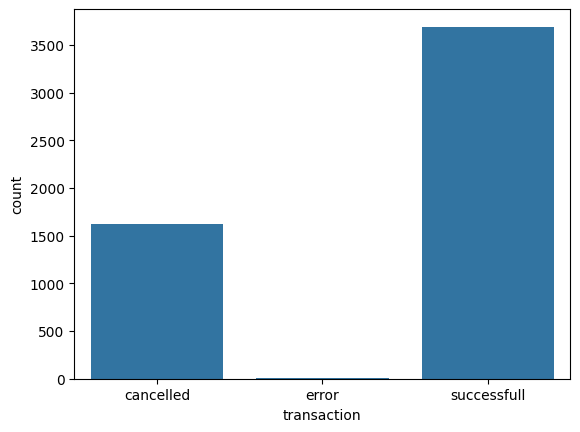

In [155]:
sns.barplot(data=transaction_count, x='transaction', y ='count')

## Шаг 10

**А теперь посчитайте, сколько успешных транзакций совершил каждый пользователь.**

**Выберите одно или несколько верных утверждений:**  
- Пользователи в среднем совершили примерно по 66 транзакций  
- Максимальное число транзакций – 82  
- Пользователи в среднем совершили по 64 транзакции  
- Примерно 25% пользователей совершили менее 61 транзакции  
- Примерно 25% пользователей совершили более 61 транзакции  
- Пользователи в среднем совершили примерно по 56 транзакций  
- Максимальное число транзакций – 112  
- Пользователи в среднем совершили примерно по 94 транзакции

Шаги выполнения:  
1. Оставьте только записи об успешных транзакциях (см.колонку `transaction`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы отобрать только нужные записи, есть два способа:

1) Используйте аксессор `loc[]`, внутри которого напишите условие, что значение в столбце `transaction` датафрейма `data` равно `'successfull'`.

Как использовать аксессор? Например, код
```python
df.loc[df["col_1"] > 35]
```
вернет только те строки датафрейма `df`, где значения в колонке `col_1` больше 35.

2) Используйте метод `query()`, внутри которого напишите строку с условием, что значение в столбце `transaction` датафрейма `data` равно `'successfull'`. Учтите, что условие нужно писать в кавычках, а название колонки — без кавычек.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
      
Помните, что один знак равно означает присвоение, а два — проверку на равенство
      
</p>
</details>

In [157]:
data.loc[data.transaction == 'successfull']



,date,name,transaction
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
6,2020-03-02 00:54:12,Olga_Lesnova,successfull
7,2020-03-02 00:18:43,Irina_Lesnova,successfull
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull
...,...,...,...
5309,2020-03-02 01:26:13,Olga_Ozerova,successfull
5310,2020-03-02 00:09:28,Vasilisa_Fedorova,successfull
5311,2020-03-02 00:46:31,Vasilisa_Ozerova,successfull
5312,2020-03-02 00:16:38,Olga_Polyanova,successfull


2. Посчитайте, сколько успешных транзакций совершил каждый пользователь

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные по столбцу `name`, используя метод `groupby()`**. Его вызов группирует строки по значениям в какой-то колонке (или комбинации значений из нескольких колонок). Чтобы колонка `name` не оказалась в индексе, используйте параметр `as_index=False`. Например,

```python
df.groupby('col_1', as_index=False)
```
сгруппирует данные датафрейма `df` по колонке `col_1`. При этом колонка `col_1` останется колонкой, а не индексом. Сама по себе группировка не вычисляет что-то по группам.
      
**После группировки используйте метод `size()`**, который посчитает, сколько раз встречается каждое значение из колонки, по которой была проведена группировка. В метод ничего подавать не нужно.

**Как использовать метод `size()` после группировки?** Используйте цепочку методов, применив их друг за другом. Например:
```python
df.some_method_1().some_method_2()
```      
</p>
</details>

In [167]:
name_successfull_transaction = data.loc[data.transaction == 'successfull'].groupby('name', as_index=False).size()


3. Выведите описательную статистику, чтобы получить точные цифры

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как получить описательную статистику по столбцам?** Используйте метод `describe()`, применив его к датафрейму с числом успешных транзакций для каждого пользователя (со 2 шага выполнения)
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [169]:
name_successfull_transaction.describe()


,name,size
0,Ekaterina_Fedorova,72
1,Ekaterina_Ivanova,59
2,Ekaterina_Lesnova,63
3,Ekaterina_Ozerova,72
4,Ekaterina_Petrova,68
5,Ekaterina_Polyanova,68
6,Ekaterina_Smirnova,77
7,Irina_Fedorova,62
8,Irina_Ivanova,60
9,Irina_Lesnova,76


4. Выберите верные утверждения

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Ориентируйтесь на значения, полученные с помощью метода describe.
      
**Что значат показатели, полученные с помощью метода describe?**
- count — количество значений, не считая пропуски
- mean — среднее значение по столбцу
- std — стандартное отклонение по столбцу
- min, max — минимальное и максимальное значения в столбце
- 25%, 50%, 75% — квартили распределения (числа, которые больше определённого процента значений в распределении). Например, 50%-й квартиль больше известен как медиана — число, которое больше 50% всех значений.      
</p>
</details>

## Шаг 11

**На основе расчетов с прошлого шага постройте гистограмму, на которой по оси `x` будет отложено число транзакций, а по оси `y` — количество пользователей с таким числом транзакций.**

**Выберите одно или несколько верных утверждений:**  
- Ни один пользователь не совершил 45 транзакций  
- Пользователей, совершивших от 45 до 55 транзакций, меньше, чем пользователей, совершивших от 70 до 80 транзакций  
- Пользователей, совершивших от 45 до 55 транзакций, больше, чем пользователей, совершивших от 70 до 80 транзакций  
- Распределение явно скошено влево (пик слева и низкие значения в центре и справа)
- Распределение имеет пик по центру и снижающиеся значения по бокам

Шаги выполнения:  
1. На основе данных из прошлого шага постройте гистограмму, используя функцию `sns.displot()`. Функция визуализации сама посчитает, сколько пользователей совершили то или иное число транзакций)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.displot()` следующие параметры:  
      `data` — датафрейм с расчетами, сколько успешных транзакций совершил каждый пользователь (с прошлого шага)  
      `x` — название колонки из этого датафрейма (`size`) с числом транзакций   
      
Например:      
```python
sns.displot(data=df, x='col_name')
```
построит гистограмму на основе данных из колонки `col_name` датафрейма `df`
</p>
</details>

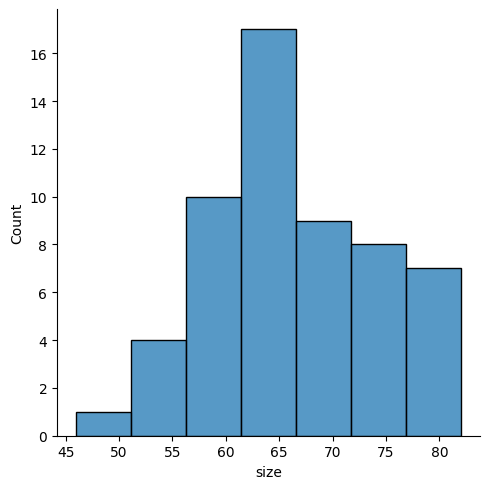

In [173]:
sns.displot(data=name_successfull_transaction, x='size')

2. Выберите одно или несколько верных утверждений

## Шаг 12

**К вам пришёл коллега из маркетингового отдела с немного обновленными данными — см.датасет `transaction_data_updated.csv`.** Он попросил сформировать сводную таблицу, которая покажет, какое количество операций осуществлял каждый пользователь в каждую минуту наблюдаемого временного промежутка. Эта информация нужна вашему коллеге для того, чтобы оценить, не было ли аномального скачка в количестве операций — как раз в то время рекламу вашей компании опубликовал известный блогер, ваш коллега хочет отследить, была ли быстрая реакция на неё.

**Постройте сводную таблицу `pivot_trans_per_min`,** где:

- столбцы – имена пользователей  
- строки – минута времени осуществления операции (см.колонку `minute`)  
- значения – число совершённых операций

Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно — постройте табличку по всем.

**На LMS датафрейм сохранен в переменную `df`. Загрузите в LMS Ваш код, в котором создаете сводную таблицу `pivot_trans_per_min` и заполняете пропуски нулями**

Шаги выполнения:  
1. Загрузите csv файл к уроку в свою папку в JupyterНub
2. Прочитайте этот датасет, результат сохранив в переменную `df`. Колонку `date` прочитайте как дату — это понадобится дальше

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Данные находятся в файле формата CSV. Для их загрузки воспользуйтесь функцией `pd.read_csv()`, передав в качестве аргумента путь к файлу. В параметр `parse_dates` передайте список, содержащий название единственной колонки — `date`. Например,
```python
df = pd.read_csv('data.csv', parse_dates=['col_date'])
```
считает файл `data.csv`, хранящийся в той же папке, что и юпитер ноутбук, в котором вы сейчас работаете. В колонке `col_date` тип данных будет datetime
</p>
</details>

In [183]:
df = pd.read_csv('../data/transaction_data_updated.csv', parse_dates=['date'])

3. Посмотрите на содержимое датафрейма, проверьте его размер

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
**Как посмотреть на содержимое датафрейма?** Используйте метод `head()`

**Как проверить размер датафрейма?** Используйте атрибут `shape`, чтобы узнать количество строк и столбцов. Этот атрибут возвращает кортеж, первый элемент которого указывает на количество строк, а второй — на количество столбцов в датафрейме.  
      
**Как обратиться к атрибуту датафрейма?** Для этого нужно написать переменную, где хранится датафрейм, поставить точку и написать название атрибута (без скобок!). Например:
```python
df.some_attribute
```
так мы обратимся к атрибуту `some_attribute` у датафрейма в переменной `df`
      
**Как использовать метод?** Например применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```
</p>
</details>

In [185]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5315 non-null   datetime64[ns]
 1   name         5315 non-null   object        
 2   transaction  5315 non-null   object        
 3   minute       5315 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 166.2+ KB


,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


4. Посчитайте, какое количество операций осуществлял каждый пользователь (см.колонку `name`) в каждую минуту (см.колонку `minute`)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сгруппируйте данные данные одновременно по двум колонкам — `name` и `minute`, используя метод `groupby()`**.

**Как сгруппировать по нескольким колонкам?** Передайте в метод `groupby()` не строку-название колонки, а список с названиями колонок. Например:
```python
df.groupby(['col_1', 'col_2'])
```
сгруппирует по комбинации значений `col_1` и `col_2`.
      
**Не забудьте использовать параметр `as_index=False` при группировке, это нам понадобится для следующего шага.**
      
**После группировки используйте метод `size()`**, который посчитает, сколько раз встречается каждая пара значений из двух колонок, по которым была проведена группировка. В метод ничего подавать не нужно.

**Как использовать метод `size()` после группировки?** Используйте цепочку методов, применив их друг за другом. Например:
```python
df.some_method_1().some_method_2()
```      
</p>
</details>

In [203]:
trans_per_min = df.groupby(['name', 'minute'], as_index=False).size()


5. Измените структуру получившегося датафрейма так, чтобы в столбцах были имена пользователей, в строках – минуты времени осуществления операции, а в значениях – число совершённых операций

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `pivot()`**. В параметр `index` передайте название колонки с минутами, в параметр `columns` — название колонки с именами, а в параметр `values` — название колонки с числом операций.

**Как использовать метод?** Например, применим метод `some_method()` к датафрейму `df`:
```python
df.some_method()
```

**Если не получается**, убедитесь, что вы использовали параметр `as_index=False` при группировке.
</p>
</details>

In [202]:
pivot_trans_per_min = trans_per_min.pivot(index= 'minute', columns='name', values='size')
# pivot_trans_per_min = 




6. Заполните пропущенные значения нулями и сохраните получившийся результат в переменную `pivot_trans_per_min`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Используйте метод `fillna()`**. В качестве аргумента подайте в него то значение, которым хотите заполнить пропуски

**Как использовать метод?** Например, применим метод `some_method()` к датафрейму `df` и сохраним результат в `df_new`:
```python
df_new = df.some_method()
```
</p>
</details>

In [205]:
pivot_trans_per_min = pivot_trans_per_min.fillna(0)



7. Скопируйте и загрузите в LMS Ваш код, начиная с 4 шага выполнения

## Шаг 13

Получив сводную таблицу, ваш коллега построил по ней график, где по оси `x` – минута транзакции (сколько минут прошло с начала дня), а по оси `y` – число транзакций. Но коллега сомневается, что в данных нет ошибки

![](https://ucarecdn.com/76242146-2d40-40d8-9a4d-2069d97da56f/-/crop/746x502/52,40/-/preview/)

**Определите, из-за чего мы видим такую картину. Произошла ошибка или с данными всё хорошо? Выберите один вариант:**

- Всё хорошо!  
- Вместо минут извлекли дни, а не сколько минут прошло с начала дня  
- Извлекли минутную часть времени, а не число минут с начала дня  
- В столбец minute записали число транзакций, совершенных пользователем

Шаги выполнения:  
1. Суммируйте количество транзакций в каждую минуту, используя датафрейм `pivot_trans_per_min`, полученный на предыдущем шаге

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Используйте метод `sum()`, применив его к датафрейму `pivot_trans_per_min`. В методе задайте параметр `axis=1`, чтобы складывались значения из всех колонок построчно.

Как использовать метод? Например применим метод `some_method()` к датафрейму `df`, задав параметр `some_parameter` равным нулю:
```python
df.some_method(some_parameter=0)
```
</p>
</details>

In [207]:
pivot_trans_per_min.sum()


name
Ekaterina_Fedorova     109.0
Ekaterina_Ivanova       83.0
Ekaterina_Lesnova       87.0
Ekaterina_Ozerova      110.0
Ekaterina_Petrova      100.0
Ekaterina_Polyanova     97.0
Ekaterina_Smirnova     105.0
Irina_Fedorova          99.0
Irina_Ivanova           89.0
Irina_Lesnova          106.0
Irina_Ozerova          106.0
Irina_Petrova           91.0
Irina_Polyanova         86.0
Irina_Smirnova          93.0
Julia_Fedorova          93.0
Julia_Ivanova           98.0
Julia_Lesnova           92.0
Julia_Ozerova           74.0
Julia_Petrova          108.0
Julia_Polyanova         88.0
Julia_Smirnova          95.0
Lolita_Fedorova        101.0
Lolita_Ivanova         107.0
Lolita_Lesnova          77.0
Lolita_Ozerova          87.0
Lolita_Petrova          91.0
Lolita_Polyanova        94.0
Lolita_Smirnova         96.0
Masha_Fedorova         100.0
Masha_Ivanova           97.0
Masha_Lesnova           99.0
Masha_Ozerova          112.0
Masha_Petrova           89.0
Masha_Polyanova        108.0
Masha_Smi

2. На основе получившегося датафрейма постройте барплот (столбчатую диаграмму)

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Примените к получившимся данным аксессор `plot` и метод `bar()` из библиотеки `pandas`. Чтобы график был читаемым, увеличьте его размер, задав параметр `figsize` внутри метода. Например:
```python
df.plot.bar(figsize=(5,5))
```      
построит барплот на основе данных из датафрейма `df`, при этом размер графика будет 5 на 5 дюймов
</p>
</details>

<Axes: xlabel='name'>

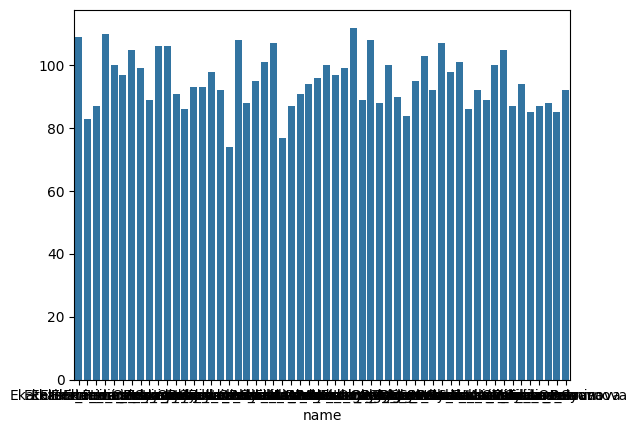

In [208]:
sns.barplot(data=pivot_trans_per_min.sum())



3. Посмотрите, получился ли у вас такой же график, как у вашего коллеги? Если нет, подумайте, в чем причина различий? Если да, подумайте, что не так с графиком?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Обратите внимание на максимальное число минут и на то, что количество транзакций в первой половине графика отличается от количества во второй.
</p>
</details>

4. Посмотрите на данные в колонке `date` — соответствует ли им график?

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
<p>

Используйте метод `describe()`, применив его к колонке `date`. Чтобы вывести нужные показатели по дате, используйте параметр `datetime_is_numeric=True`. Если выполняли задание не в JupyterHub нашего курса, то параметр может и не понадобиться.
      
**Как использовать метод?** Например применим метод `some_method()`, с параметром `some_parameter` равным False, к колонке `col_name` датафрейма `df`:
```python
df.col_name.some_method(some_parameter=False)
```
    
**Убедитесь, что колонка `date` имеет тип datetime**
    
**Обратите внимание на максимальное значение времени — отражено ли оно на графике?**
</p>
</details>

In [90]:
# Ваш код здесь



## Шаг 14

Что ж, ошибку в работе с данными совершить легко. **Исправьте её и подсчитайте правильное количество минут, прошедших с начала дня, сохранив результаты в новой колонке `true_minute`.**

Постройте график и посмотрите, произошли ли изменения. Из-за того, что теперь вариантов минут больше, используйте другой тип графика — гистограмму распределения (см.функцию `sns.displot`).

**На LMS датафрейм сохранен в переменную `df`, колонка `date` прочитана как дата. Загрузите в LMS Ваш код, в котором создаете колонку `true_minute`. Код с построением графика копировать в LMS не нужно**

Шаги выполнения:  
1. Подсчитайте правильное количество минут, учтя в том числе количество часов, прошедших с начала дня. Результаты сохраните в новой колонке `true_minute`

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

**Сложите число минут и число часов, умноженное на 60 (чтобы перевести часы в минуты)**.
      
**Чтобы получить число минут,** используйте аксессор `dt` и укажите период `minute`.

**Чтобы получить число часов,** используйте аксессор `dt` и укажите период `hour`.

Например:
```python
df.col_datetime.dt.day
```    
вернет номера дней в колонке `col_datetime` с типом данных datetime
      
**Колонка `date` должна иметь тип `datetime`**.  
</p>
</details>

In [220]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour * 60
df.head(10)

,date,name,transaction,minute,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,17
5,2020-03-02 01:09:55,Irina_Polyanova,cancelled,9,69
6,2020-03-02 00:54:12,Olga_Lesnova,successfull,54,54
7,2020-03-02 00:18:43,Irina_Lesnova,successfull,18,18
8,2020-03-02 00:06:10,Vasilisa_Petrova,successfull,6,6
9,2020-03-02 00:47:06,Olga_Petrova,successfull,47,47


2. Постройте гистограмму распределения количества транзакций по минутам, прошедшим с начала дня

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Передайте в функцию `sns.displot()` следующие параметры:  
      `data` — датафрейм с данными  
      `x` — название колонки из этого датафрейма (`true_minute`) с числом минут, прошедшим с начала дня
      
Например:      
```python
sns.displot(data=df, x='col_name')
```
построит гистограмму на основе данных из колонки `col_name` датафрейма `df`.
</p>
</details>

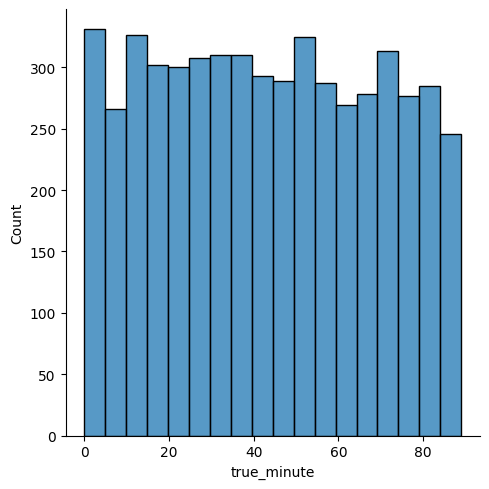

In [221]:
sns.displot(data=df, x='true_minute')



3. Скопируйте и загрузите в LMS ваш код с первого шага выполнения — в котором создаете колонку `true_minute`

## Итоги

В этом уроке вы проанализировали несколько наборов данных о транзакциях и научились подготавливать данные к анализу, удалять дубликаты и другие лишние данные, определять, какие данные нужно оставить, а в каких есть ошибка, заполнять пропуски, строить сводные таблицы и корректные графики.